In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv("../results/outputs/feature_engineered_telco_data.csv")

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

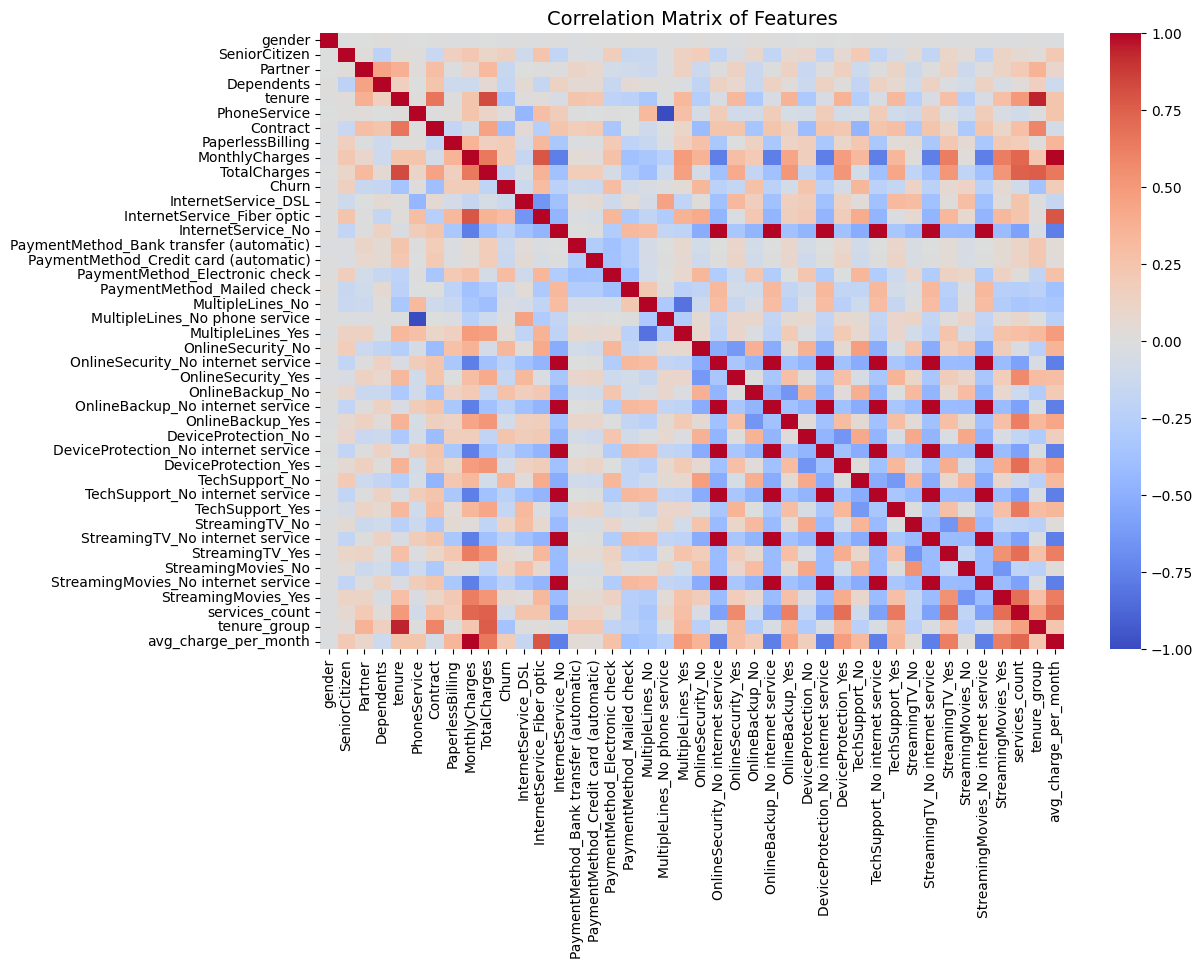

In [2]:
# EDA - Correlation Matrix
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)  # Only numeric/bool
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Features", fontsize=14)
plt.show()

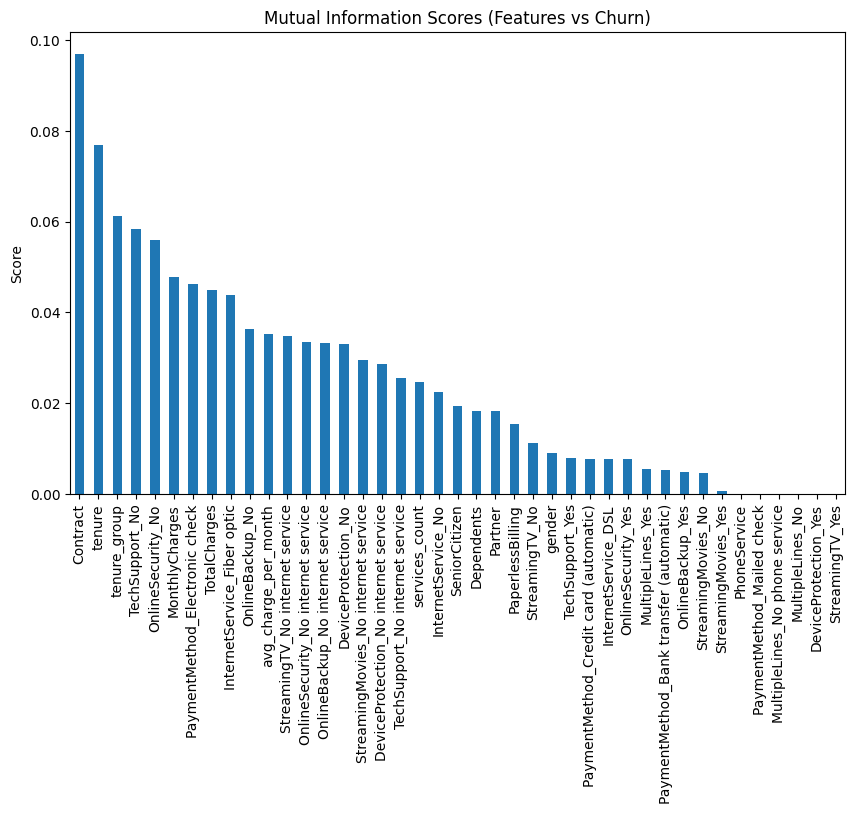

In [3]:
# Statistical Feature Importance - Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)

mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
mi_results.plot(kind="bar")
plt.title("Mutual Information Scores (Features vs Churn)")
plt.ylabel("Score")
plt.show()

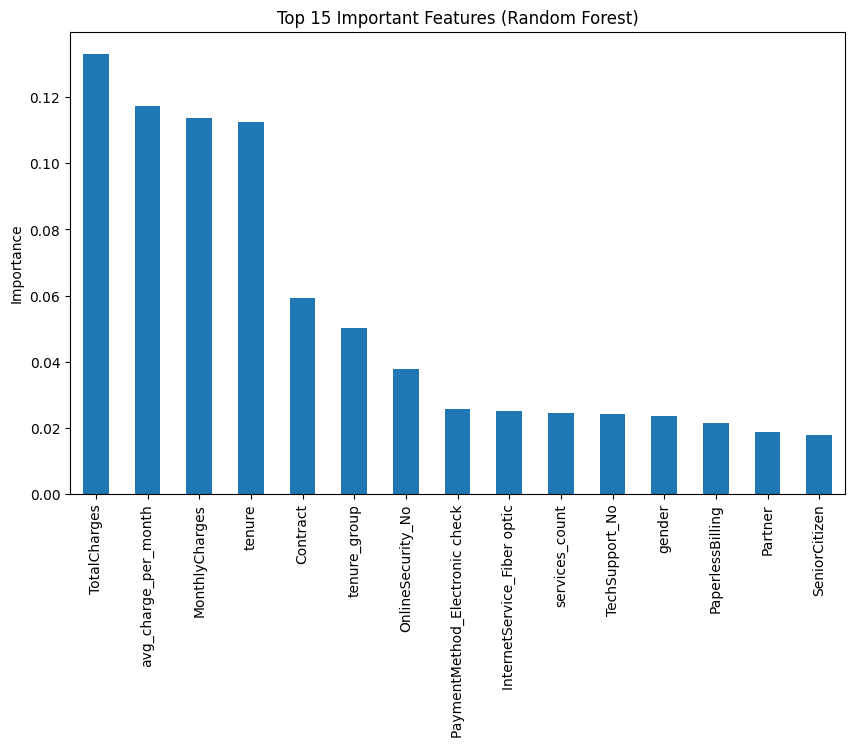

In [4]:
# Model-based Feature Selection (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).plot(kind="bar")
plt.title("Top 15 Important Features (Random Forest)")
plt.ylabel("Importance")
plt.show()

In [5]:
# Select features above mean importance
selector = SelectFromModel(rf, threshold="mean", prefit=True)
selected_features = X.columns[selector.get_support()]

print("Selected Features:\n", selected_features.tolist())

Selected Features:
 ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'OnlineSecurity_No', 'services_count', 'tenure_group', 'avg_charge_per_month']


In [6]:
# Final Reduced Dataset
X_selected = X[selected_features]
print("Shape before feature selection:", X.shape)
print("Shape after feature selection:", X_selected.shape)

Shape before feature selection: (7043, 41)
Shape after feature selection: (7043, 10)


In [7]:
X_selected.to_csv('../results/outputs/feature_selected_telco_data.csv', index=False)